# Relative Elevation Model: French Broad River

##### A REM is a representation of the elevation above river height, which highlights a river's meandering through a landscape.

## Step0: Setup

In [3]:
#Install packages
#!pip install osmnx scipi xarray rioxarray matplotlib datashader -q

ERROR: You must give at least one requirement to install (see "pip help install")


In [1]:
#Import packages
import numpy as np
import pandas as pd
import geopandas as gpd  # Vector data handling
import osmnx as ox       # Downloading data from OSM

from shapely.geometry import box
from scipy.spatial import cKDTree as KDTree # For Inverse Distance Weight calculation

import xarray as xr    
import xrspatial    # Hillshading
import rioxarray    # Working with geospatial data in xarray

import matplotlib.pyplot as plt
from datashader.transfer_functions import shade, stack

c:\Users\thsmi\miniconda3\envs\gisprojs\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


## Step 1: Download & Load DEM

Download your DEM here: https://apps.nationalmap.gov/lidar-explorer/#/

The one I am using: https://www.sciencebase.gov/catalog/item/6274abaad34e8d45aa6e200f


In [4]:
dem = rioxarray.open_rasterio('C:/Users/thsmi/Desktop/sampledata/watermap_data/USGS_13_n36w083_20220504.tif')

Clip DEM to focus area

In [3]:
import geojson

Useful site to get coordinates of a subset study area: https://boundingbox.klokantech.com/

copy & paste as GEOJSON

In [5]:
geom = '''{"type": "Polygon",
            "coordinates":[[
            [-82.8111970594,35.8118632884],
            [-82.7061402862,35.8118632884],
            [-82.7061402862,35.90535564],
            [-82.8111970594,35.90535564],
            [-82.8111970594,35.8118632884]]]}'''

In [7]:
crop_geom = [geojson.loads(geom)]
cropped = dem.rio.clip(geometries=crop_geom, crs=4326) #WGS 1984 
cropped = cropped.coarsen(x=3, boundary='trim').mean().coarsen(y=3, boundary='trim').mean() #understand this better

Now lets see that DEM

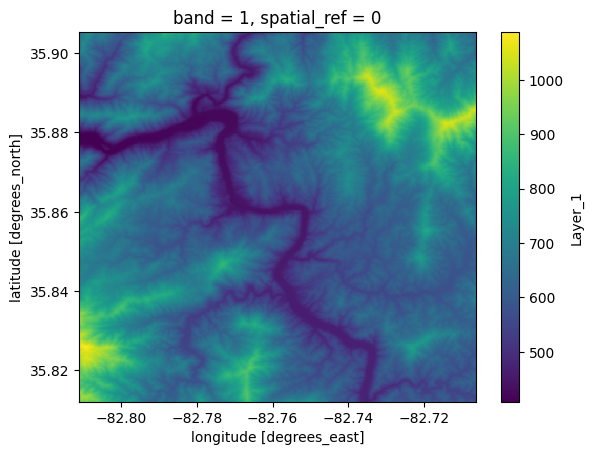

In [8]:
cropped.squeeze().plot.imshow()